In [1]:
%%HTML
<h1>
    Author: Zackary Bair<br>
    Project: Sodium Iodide<br>
    File: zackaryBairApplicationVersion.ipynb<br>
</h1>
<h2>
    <br>
    <br>
    Better working software for the Hantek PC Oscilloscope/Function Gernerator.<br>
    Some of the code was given by a fellow student.<br>
    Done as research under Professor To at California State University Stanislaus.
</h2>


In [2]:
%%HTML
<h3>
    Below are the global variables for the software.  Things to change how the program function are down below
</h3>


In [44]:
#PLOT
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

#used for calling the read data from the scope
NUMBER_OF_SAMPLES_READ = 2000
#changes how many points are displayed in the plot
NUMBER_OF_SAMPLES_SAVED = 150 #half of the points on the plot

#changes the dimensions of the plot
PLOT_WIDTH = 15
PLOT_HEIGHT = 6
NUMBER_OF_ROWS = 1
NUMBER_OF_COLUMNS = 3
#NOTE: specifications for individual plots in the large plot are in the main function

#changes the lables on the plot's axises
PLOT_LABEL_X_AXIS = 'time[uS]'
PLOT_LABEL_Y_AXIS = 'Volt [V]'

#time of pause between plots updating (each multiple of 1 is a second)
PAUSE_TIME = 1


#TRIGGERS
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

#the triggers for the detectors
CHANNEL_ONE_TRIG = 0.01
CHANNEL_TWO_TRIG = 0.01

#veto means only channel one was triggered (could be a gamma ray)
TRIGGER_TYPE = 'Veto'
#coincidence means both channel one and channel two was triggered (possibly a muon)
#TRIGGER_TYPE = 'Coincidence'
#negative means that no channel was triggered (no interactions)
#TRIGGER_TYPE = 'Negative'

#number of data points for the coincidence window
COINCIDENCE_WINDOW = 50


#FORMATTING
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

#header formatting
HEADER = ['Time', 'Channel One', 'Channel Two']

USER_NAME = 'bairz'
#common users
#bairz - Zackary's desktop
#Zackary Bair - Zackary's laptop

#directory for the csv data file
#most common directory will be in the "C:" drive (what the os will be on)
USER_DIRECTORY = 'C:\\Users\\' + USER_NAME
DIRECTORY_OUT = USER_DIRECTORY + '\\Documents\\RISE\\2020\\Spring\\NaI\\PythonFiles\\Data\\'
FILE_EXTENSION = '.csv'


#CONTROL LOOP
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

#with a one second pause, time ran = varseconds * (range)
#var is dependent on processing power and can be between 27-32 based on tests
#the var is based on processing power
#time to run scales linearly
RUN_TIME_IN_MINUTES = 1


In [45]:
%%html
<h3>
    Below is the functions for the application.<br>
    This includes main.
</h3>


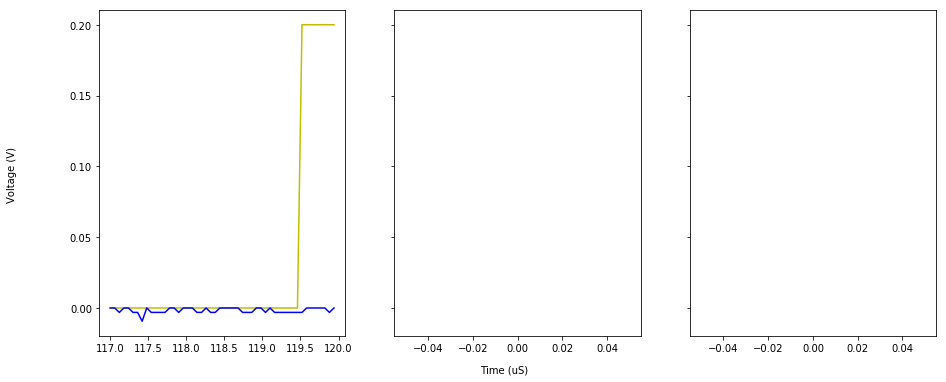

SET RUN COMPLETE.
TERMINATING PROGRAM.


In [51]:
"""
    TODO:
        create a flow chart for this
        add in full main method with driver cell
        test different triggers (go in)
            fix veto trigger to capture all events not just the largest
            fix coincidence trigger
        revamp control condition (go in)
            will need to implement a better time run method that will get as close to the time in minutes run as possible
        clean all the code up
        package all needed files for easy moving around
"""


#creates the plots in the notebook rather than in a seperate window
#doesn't always seem to be necessary?
%matplotlib inline


#IMPORTS
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

import os
import sys
import time
import csv

import matplotlib.pyplot as plt
import numpy as np

from HTSDKScope import Oscilloscope
from IPython.display import clear_output


#CLASSES
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

class NullWriter(object):
    def write(self, arg):
        """
            Disables the oscilloscope
        """
        pass
    

#FUNCTIONS
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

def SetScope(channelOneVDivIndex = 0, channelTwoVDivIndex = 0, timeDivIndex = 11): 
    """
        Sets up the scope
        Takes in an integer channelOneDivIndex
        Takes in an integer channelTwoDivIndex
        Takes in an integer timeDivIndex
        Returns a touple that contains the ___, time scale, voltage scale one, and voltage scale two
    """

    voltageScaleTwo = voltageScaleOne = timeScale = 1
    
    """
        0: ('20 mV / Div', 0.02), 
        1: ('50 mV / Div', 0.05), 
        2: ('100 mV / Div', 0.1), 
        3: ('200 mV / Div', 0.2), 
        4: ('500 mV / Div', 0.5), 
        5: ('1 V / Div', 1.0), 
        6: ('2 V / Div', 2.0), 
        7: ('5 V / Div', 5.0)        
    """
    
    if (channelOneVDivIndex == 0): 
        voltageScaleOne = 0.02 / 32
    elif (channelOneVDivIndex == 1): 
        voltageScaleOne = 0.05 / 32
    elif (channelOneVDivIndex == 2): 
        voltageScaleOne = 0.1 / 32
    elif (channelOneVDivIndex == 3): 
        voltageScaleOne = 0.2 / 32
    elif (channelOneVDivIndex == 4): 
        voltageScaleOne = 0.5 / 32
    elif (channelOneVDivIndex == 5): 
        voltageScaleOne = 1.0 / 32
    elif (channelOneVDivIndex == 6): 
        voltageScaleOne = 2.0 / 32
    else: voltageScaleOne = 5.0 / 32 
        
    if(channelOneVDivIndex == 0): 
        voltageScaleTwo = 0.02 / 32 
    elif(channelOneVDivIndex == 1): 
        voltageScaleTwo = 0.05 / 32
    elif(channelOneVDivIndex == 2): 
        voltageScaleTwo = 0.1 / 32
    elif(channelOneVDivIndex == 3): 
        voltageScaleTwo = 0.2 / 32
    elif(channelOneVDivIndex == 4): 
        voltageScaleTwo = 0.5 / 32
    elif(channelOneVDivIndex == 5): 
        voltageScaleTwo = 1.0 / 32
    elif(channelOneVDivIndex == 6): 
        voltageScaleTwo = 2.0 / 32
    else: voltageScaleTwo = 5.0 / 32
                
    # timeDivIndex 
    """
        0: ('48 MSa / s', 48000000.0), 
        1: ('48 MSa / s', 48000000.0), 
        2: ('48 MSa / s', 48000000.0), 
        3: ('48 MSa / s', 48000000.0),
        4: ('48 MSa / s', 48000000.0), 
        5: ('48 MSa / s', 48000000.0), 
        6: ('48 MSa / s', 48000000.0), 
        7: ('48 MSa / s', 48000000.0), 
        8: ('48 MSa / s', 48000000.0), 
        9: ('48 MSa / s', 48000000.0), 
        10: ('48 MSa / s', 48000000.0), 
        11: ('16 MSa / s', 16000000.0), 
        12: ('8 MSa / s', 8000000.0), 
        13: ('4 MSa / s', 4000000.0), 
        14: ('1 MSa / s', 1000000.0), 
        15: ('1 MSa / s', 1000000.0), 
        16: ('1 MSa / s', 1000000.0), 
        17: ('1 MSa / s', 1000000.0), 
        18: ('1 MSa / s', 1000000.0), 
        19: ('1 MSa / s', 1000000.0), 
        20: ('1 MSa / s', 1000000.0), 
        21: ('1 MSa / s', 1000000.0), 
        22: ('1 MSa / s', 1000000.0), 
        23: ('1 MSa / s', 1000000.0), 
        24: ('1 MSa / s', 1000000.0), 
        25: ('500 KSa / s', 500000.0), 
        26: ('200 KSa / s', 200000.0), 
        27: ('100 KSa / s', 100000.0)
    """

    if(channelOneVDivIndex == 0): 
        timeScale = 2e4
    elif(channelOneVDivIndex == 1): 
        timeScale = 2e4 * 3.
    else: 
        timeScale = 2e4 * 3.

    scopeZero = Oscilloscope(scopeid = 0)
    scopeZero.set_voltage_division(1, channelOneVDivIndex)
    scopeZero.set_voltage_division(2, channelTwoVDivIndex)
    scopeZero.set_sampling_rate(timeDivIndex)

    nullwrite = NullWriter()
    oldstdout = sys.stdout
    sys.stdout = nullwrite # disable output
    scopeZero.setup_dso_cal_level() 
    sys.stdout = oldstdout # enable output 
    return scopeZero, timeScale, voltageScaleOne, voltageScaleTwo


#MAIN
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

#setting up how the plot displays
plt.rcParams['figure.figsize'] = [PLOT_WIDTH, PLOT_HEIGHT] #[width, height]
plt.xlabel(PLOT_LABEL_X_AXIS)
plt.ylabel(PLOT_LABEL_Y_AXIS)


#scope
scopeZero = Oscilloscope(scopeid = 0)
scopeZero, timeScale, voltageScaleOne, voltageScaleTwo = SetScope(2,2,27)

#file
currentTime = time.localtime()
fileName = DIRECTORY_OUT
fileName += str(currentTime[0]) + '_' #year
fileName += str(currentTime[1]) + '_' #month
fileName += str(currentTime[2]) + '_' #day
fileName += str(currentTime[3]) #hour
fileName += str(currentTime[4]) #minute
fileName += FILE_EXTENSION

outFile = open(fileName, 'wb')
writer = csv.writer(outFile)
top = ['Trigger type:', TRIGGER_TYPE]
writer.writerow(top)


#control loop
for i in range(RUN_TIME_IN_MINUTES * 2):
    #takes in data points
    rawData = scopeZero.read_data_from_scope(data_points = NUMBER_OF_SAMPLES_READ)

    #catching error if no signal is coming in
    try:
        channelOneData = np.asarray(rawData[0]) * voltageScaleOne
        channelTwoData = np.asarray(rawData[1]) * voltageScaleTwo
        timeData = np.asarray(rawData[2]) * timeScale# conversion to microsec
    #if error is detected, terminate program
    except:
        print('ERROR: No signal is detected.')
        print('Program terminated.')
        break
        
        
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

    #veto trigger (only channel one recives a trigger)
    if (channelOneData.max() > CHANNEL_ONE_TRIG and TRIGGER_TYPE == 'Veto'):
        channelOneMax = np.argmax(channelOneData)
        
        if (channelOneMax + NUMBER_OF_SAMPLES_SAVED > NUMBER_OF_SAMPLES_READ):
            channelOneMax = NUMBER_OF_SAMPLES_READ - NUMBER_OF_SAMPLES_SAVED
            
        if (channelOneMax - NUMBER_OF_SAMPLES_SAVED < 0):
            channelOneMax = NUMBER_OF_SAMPLES_SAVED
            
            
        #plots data
        pointsPlotted = 0
        #goes through each read point
        while (pointsPlotted <= NUMBER_OF_SAMPLES_READ):
            #he dimensions for the plot
            fig, axs = plt.subplots(nrows = NUMBER_OF_ROWS, ncols = NUMBER_OF_COLUMNS, sharex = False, sharey = True)
            fig.text(0.5, 0.04, 'Time (uS)', ha = 'center')
            fig.text(0.04, 0.5, 'Voltage (V)', va = 'center', rotation = 'vertical')
            #clear output only if you want to only see the current graphs
            #to keep all graphs comment out the below line
            clear_output(wait = True)
            
            
            #filling all subplots
            for i in range(NUMBER_OF_ROWS):
                for j in range(NUMBER_OF_COLUMNS):
                    axs[i * NUMBER_OF_COLUMNS + j].plot(timeData[pointsPlotted + (NUMBER_OF_SAMPLES_SAVED * j): pointsPlotted + (NUMBER_OF_SAMPLES_SAVED * (j + 1))],
                                                        channelOneData[pointsPlotted + (NUMBER_OF_SAMPLES_SAVED * j): pointsPlotted + (NUMBER_OF_SAMPLES_SAVED * (j + 1))],
                                                        'y-',
                                                        timeData[pointsPlotted + (NUMBER_OF_SAMPLES_SAVED * j): pointsPlotted + (NUMBER_OF_SAMPLES_SAVED * (j + 1))],
                                                        channelTwoData[pointsPlotted + (NUMBER_OF_SAMPLES_SAVED * j): pointsPlotted + (NUMBER_OF_SAMPLES_SAVED * (j + 1))],
                                                        'b-')
                
                plt.show()
                
            #the pause between updates
            plt.pause(PAUSE_TIME)
            pointsPlotted += NUMBER_OF_SAMPLES_SAVED
                    
                    
        #create data
        data = []
        data.append(HEADER)
        #add in all taken data
        for i in range(timeData.size):
            row = []
            row.append(timeData[i])
            row.append(channelOneData[i])
            row.append(channelTwoData[i])
            data.append(row)
                    
        #saves data
        try:
            #writes all of the samples within the range given
            #header
            writer.writerow(data[0])
            #print(data[0])
                
            #the event data
            writer.writerows(data[channelOneMax - NUMBER_OF_SAMPLES_SAVED + 1 : channelOneMax + NUMBER_OF_SAMPLES_SAVED + 1])
        except Exception as error:
            print('ERROR: failure to save data.')
            print(error)
                    
        channelOneMax = 0
        
        
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

    #coincidence trigger (channel one is triggered and channel two is triggered within the coincidence window)
    else if (TRIGGER_TYPE == 'Coincidence'):
        #plot all data
        pointsPlotted = 0
        while (pointsPlotted <= NUMBER_OF_SAMPLES_READ):
            #the dimensions for the plot
            fig, axs = plt.subplots(nrows = NUMBER_OF_ROWS, ncols = NUMBER_OF_COLUMNS, sharex = False, sharey = True)
            fig.text(0.5, 0.04, 'Time (us)', ha = 'center')
            fig.text(0.04, 0.5, 'Voltage (V)', va = 'center', rotation = 'vertical')
            #clear output is only if you want just the current graphs plotted
            clear_output(wait = True)


            #filling all subplots
            for i in range(NUMBER_OF_ROWS):
                for j in range(NUMBER_OF_COLUMNS):
                    axs[i * NUMBER_OF_COLUMNS + j].plot(timeData[pointsPlotted + (NUMBER_OF_SAMPLES_SAVED * j): pointsPlotted + (NUMBER_OF_SAMPLES_SAVED * (j + 1))],
                                                        channelOneData[pointsPlotted + (NUMBER_OF_SAMPLES_SAVED * j): pointsPlotted + (NUMBER_OF_SAMPLES_SAVED * (j + 1))],
                                                        'y-',
                                                        timeData[pointsPlotted + (NUMBER_OF_SAMPLES_SAVED * j): pointsPlotted + (NUMBER_OF_SAMPLES_SAVED * (j + 1))],
                                                        channelTwoData[pointsPlotted + (NUMBER_OF_SAMPLES_SAVED * j): pointsPlotted + (NUMBER_OF_SAMPLES_SAVED * (j + 1))],
                                                        'b-')

                plt.show()

            #the pause between updates
            plt.pause(PAUSE_TIME)
            pointsPlotted += NUMBER_OF_SAMPLES_SAVED


        #looking for event
        for i in range(timeData.size):
            if (channelOneData[i] > CHANNEL_ONE_TRIG):
                for j in range(COINCIDENCE_WINDOW):
                    if (channelTwoData[j] > CHANNEL_TWO_TRIG):
                        #event found
                        #create data
                        data = []
                        data.append(HEADER)
                        #add in all data
                        for k in range(timeData.size):
                            row = []
                            row.append(timeData[i])
                            row.append(channelOneData[i])
                            row.append(channelTwoData[i])
                            data.append(row)

                            #saves data
                            try:
                                #writes all of the samples within the given range
                                #header
                                writer.writerow(data[0])

                                #the event data
                                eventIndex = i + j
                                writer.writerows(data[eventIndex - NUMBER_OF_SAMPLES_SAVED + 1 : eventIndex + NUMBER_OF_SAMPLES_SAVED + 1])
                            except Exception as error:
                                print('ERROR: failure to save data.')
                                print(error)

                        #correct i counter
                        i = i + j + 1
                        #break out of j loop
                        break
                
                
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

    #negative trigger (no instances one both channel one and channel two)
    else if (channelOneData.max < CHANNEL_ONE_TRIG and channelTwoData.max < CHANNEL_TWO_TRIG and TRIGGER_TYPE == 'Negative'):
        #plot all data
        pointsPlotted = 0
        while (pointsPlotted <= NUMBER_OF_SAMPLES_READ):
            #the dimensions for the plot
            fig, axs = plt.subplots(nrows = NUMBER_OF_ROWS, ncols = NUMBER_OF_COLUMNS, sharex = False, sharey = True)
            fig.text(0.5, 0.04, 'Time (us)', ha = 'center')
            fig.text(0.04, 0.5, 'Voltage (V)', va = 'center', rotation = 'vertical')
            #clear output is only if you want just the current graphs plotted
            clear_output(wait = True)
            
            
            #filling all subplots
            for i in range(NUMBER_OF_ROWS):
                for j in range(NUMBER_OF_COLUMNS):
                    axs[i * NUMBER_OF_COLUMNS + j].plot(timeData[pointsPlotted + (NUMBER_OF_SAMPLES_SAVED * j): pointsPlotted + (NUMBER_OF_SAMPLES_SAVED * (j + 1))],
                                                        channelOneData[pointsPlotted + (NUMBER_OF_SAMPLES_SAVED * j): pointsPlotted + (NUMBER_OF_SAMPLES_SAVED * (j + 1))],
                                                        'y-',
                                                        timeData[pointsPlotted + (NUMBER_OF_SAMPLES_SAVED * j): pointsPlotted + (NUMBER_OF_SAMPLES_SAVED * (j + 1))],
                                                        channelTwoData[pointsPlotted + (NUMBER_OF_SAMPLES_SAVED * j): pointsPlotted + (NUMBER_OF_SAMPLES_SAVED * (j + 1))],
                                                        'b-')
                
                plt.show()
                
            #the pause between updates
            plt.pause(PAUSE_TIME)
            pointsPlotted += NUMBER_OF_SAMPLES_SAVED
        
        
        #create data
        data = []
        data.append(HEADER)
        for i in range(timeData.size):
            row = []
            row.append(timeData[i])
            row.append(channelOneData[i])
            row.append(channelTwoData[i])
            data.append(row)
        
        #save all data
        try:
            #writes all of the samples
            #header
            writer.writerow(data[0])
            
            #all of the data
            writter.writerows(data)
        except Exception as error:
            print('ERROR: failure to save data.')
            print(error)
        
    
#NOTE always close file to avoid issues with it
outFile.close()
    
            
print('SET RUN COMPLETE.')
print('TERMINATING PROGRAM.')
